# **Módulo 6: Machine Learning**

**Machine Learning** (ML), o aprendizaje automático, es una rama de la inteligencia artificial (IA) que se enfoca en construir sistemas capaces de aprender y mejorar automáticamente a partir de los datos sin necesidad de ser programados de manera explícita. Estos sistemas permiten identificar patrones y tomar decisiones basadas en grandes volúmenes de datos, aplicándose en diversas áreas como la clasificación de imágenes, la predicción de ventas o la personalización de recomendaciones.

Uno de los algoritmos más simples y utilizados en Machine Learning es la **regresión lineal**, que permite predecir una variable continua a partir de la relación entre una variable dependiente y una o más variables independientes. Cuando se consideran múltiples variables independientes, se utiliza la **regresión múltiple** para mejorar las predicciones. A medida que los datos se vuelven más complejos, es importante aplicar técnicas como la **regresión Ridge** y **Lasso**, que introducen penalizaciones para evitar el sobreajuste y mejorar la regularización de los modelos. Ridge tiende a minimizar la magnitud de los coeficientes, mientras que Lasso puede reducir algunos de estos coeficientes a cero, facilitando la selección de las características más relevantes.

En el ámbito de la clasificación, uno de los algoritmos más comunes es **Naive Bayes**, un modelo probabilístico basado en el teorema de Bayes que resulta especialmente útil para problemas donde se puede asumir independencia entre las características, como la clasificación de texto o el filtrado de correos no deseados. Otro algoritmo utilizado para clasificación es **K-Vecinos Más Cercanos (K-NN)**, que clasifica los nuevos datos en función de la cercanía a sus vecinos más cercanos, lo cual lo convierte en un enfoque intuitivo pero potencialmente costoso cuando se maneja un gran volumen de datos.

Para abordar problemas más complejos que requieren modelos más potentes, se utilizan algoritmos avanzados como las **Máquinas de Soporte Vectorial (SVM)**, que buscan un hiperplano óptimo para separar las clases en un espacio de características. También destacan los modelos basados en árboles, como **Random Forest**, que combina varios árboles de decisión para mejorar la precisión y robustez del modelo, reduciendo el riesgo de sobreajuste. Un modelo de gran eficacia es **XGBoost**, una técnica de boosting que construye modelos secuenciales de árboles de decisión, lo que lo hace altamente eficiente y efectivo en grandes volúmenes de datos.

La correcta **evaluación del modelo** es fundamental para garantizar que no solo funcione bien en los datos de entrenamiento, sino que también pueda generalizarse a datos nuevos. Este proceso incluye dividir los datos en conjuntos de entrenamiento y prueba, o utilizar validación cruzada. Las métricas más comunes para evaluar el rendimiento del modelo varían según el tipo de problema. En el caso de la regresión, se suelen utilizar métricas como el error cuadrático medio (MSE), el error absoluto medio (MAE) y el coeficiente de determinación (R²). Para la clasificación, se emplean métricas como la exactitud, la precisión, la recuperación (recall), la F1-Score y la curva ROC-AUC, que permiten medir la capacidad del modelo para distinguir entre las diferentes clases.

Finalmente, las **redes neuronales** son modelos avanzados inspirados en la estructura del cerebro humano, que permiten resolver problemas complejos y no lineales. Estas redes están compuestas por capas de neuronas artificiales que transforman los datos a través de cálculos matemáticos. Las redes neuronales han demostrado ser especialmente útiles en aplicaciones como el reconocimiento de imágenes, el procesamiento de lenguaje natural y el análisis de grandes volúmenes de datos.

## **Arthur Samuel: Pionero del Aprendizaje Automático y la Inteligencia Artificial**

Arthur Samuel fue un visionario en el campo de la inteligencia artificial y la computación. Nacido en 1901, Samuel se graduó en ingeniería eléctrica y comenzó su carrera trabajando en IBM, donde se convirtió en uno de los pioneros del desarrollo de software y en uno de los primeros en explorar el potencial de las máquinas para "aprender" por sí mismas. A través de su trabajo, sentó las bases de lo que hoy conocemos como **aprendizaje automático** (*Machine Learning*).

El logro más reconocido de Samuel fue el desarrollo del programa **"Jugador de Damas"** en 1959, donde utilizó conceptos de lo que más tarde se llamaría **aprendizaje por refuerzo** y **algoritmos heurísticos**. Su programa no solo jugaba a las damas, sino que también era capaz de mejorar su habilidad con el tiempo, jugando contra sí mismo y aprendiendo de sus errores. Lo innovador de este enfoque fue que permitía que el programa ajustara sus estrategias con base en la retroalimentación de las partidas previas, optimizando su desempeño sin intervención humana directa.

Samuel también fue uno de los primeros en utilizar el término **"aprendizaje automático"**, lo que indica su clara visión de que las máquinas podrían, algún día, desarrollar la capacidad de aprender de manera similar a los humanos. Este concepto marcó un punto de inflexión en la historia de la informática y la IA, ya que introdujo la idea de que las computadoras podían ser programadas no solo para ejecutar tareas específicas, sino también para **aprender y adaptarse** a nuevas situaciones y mejorar su rendimiento a medida que acumulaban experiencia.

El impacto de Arthur Samuel se extiende más allá de su programa de damas. Su trabajo inspiró a generaciones de investigadores en inteligencia artificial y aprendizaje automático, y es recordado como uno de los primeros en abrir el camino para el desarrollo de sistemas de IA modernos que, como los humanos, pueden aprender y mejorar a través de la experiencia. Gracias a sus contribuciones, Samuel es reconocido como uno de los **padres fundadores de la inteligencia artificial**.

![arthur](_image/arthut.jpg) 

## **Generalización, sobreajuste y subajuste**

En el **aprendizaje supervisado**, el objetivo principal es construir un modelo a partir de los datos de entrenamiento y que este sea capaz de realizar **predicciones precisas** sobre datos desconocidos que tengan las mismas características que el conjunto de entrenamiento utilizado. Si un modelo es capaz de hacer predicciones acertadas sobre datos nuevos, decimos que tiene la capacidad de **generalizar** desde el conjunto de **entrenamiento** al conjunto de **prueba**. Nuestro objetivo es construir un modelo que pueda **generalizar** con la mayor precisión posible.

Por lo general, entrenamos un modelo de manera que sea preciso en el conjunto de entrenamiento. Si los conjuntos de **entrenamiento** y de **prueba** comparten suficientes similitudes, esperamos que el modelo también funcione bien en el conjunto de prueba. Sin embargo, esto no siempre es así. Si construimos modelos demasiado complejos, podemos lograr un ajuste perfecto en el conjunto de entrenamiento, pero esto no garantiza que el modelo generalice bien a datos nuevos, lo que lleva a un fenómeno conocido como **sobreajuste**.

El **sobreajuste (overfitting)** ocurre cuando el modelo se ajusta demasiado a las particularidades y ruido del conjunto de entrenamiento, lo que resulta en un modelo que tiene un rendimiento excelente en dicho conjunto, pero falla al enfrentarse a datos no vistos. Por el contrario, si el modelo es demasiado simple, podría no capturar adecuadamente la complejidad y variabilidad de los datos, causando un mal desempeño tanto en el conjunto de entrenamiento como en el de prueba. Esta situación se conoce como **subajuste (underfitting)**.

El desafío en el aprendizaje supervisado es encontrar un balance adecuado entre un modelo demasiado simple y uno excesivamente complejo, de modo que pueda generalizar correctamente y ofrecer un rendimiento sólido en datos nuevos.

![overunder](_image/overunder.png) 

:::{admonition} **Observación**
:class: warning

- **Cuanto más complejo permitimos que sea nuestro modelo, mejor podremos predecir en los datos de entrenamiento**. Sin embargo, si nuestro **modelo se vuelve demasiado complejo**, empezamos a **centrarnos demasiado en cada punto de datos individual de nuestro conjunto de entrenamiento**, y el modelo **no se generalizará correctamente con nuevos datos**. 
- Hay un **punto intermedio (sweet spot)** en el que se obtiene el mejor rendimiento de generalización. Este es el modelo que queremos encontrar. El **equilibrio entre el overfitting y underfitting**.

:::

![sweet_spot](_image/sweet_spot.png) 

## **Regresión**

La **regresión** es una técnica estadística y de aprendizaje automático utilizada para modelar la relación entre una **variable dependiente** (o respuesta) y una o más **variables independientes** (o predictoras). El objetivo principal de la regresión es predecir el valor de la variable dependiente en función de los valores de las variables independientes, o entender cómo las variables independientes influyen en la variable dependiente.

Existen varios tipos de regresión, siendo los más comunes la **regresión lineal** y la **regresión no lineal**, que se seleccionan en función de la relación entre las variables.

### **Tipos de regresión**

1. **Regresión lineal**: Este es el tipo más básico de regresión, donde se asume que la relación entre la variable dependiente y las variables independientes es lineal. Se busca ajustar una línea recta que mejor represente los datos, minimizando la distancia entre los puntos de los datos y la línea ajustada. La **regresión lineal simple** involucra solo una variable independiente, mientras que la **regresión lineal múltiple** involucra varias variables independientes.

2. **Regresión Ridge y Lasso**: Son variaciones de la regresión lineal que incluyen regularización para evitar el sobreajuste. **Ridge** agrega una penalización a la magnitud de los coeficientes del modelo, mientras que **Lasso** no solo penaliza los coeficientes, sino que también puede llevar algunos de ellos a cero, lo que resulta en la selección automática de características.

### **Modelo de regresión lineal**

El objetivo principal de la regresión es encontrar los **coeficientes** que mejor ajusten el modelo, minimizando el **error** o la diferencia entre los valores predichos y los valores reales. 

El modelo tiene la forma:

$$
\boldsymbol{y}=\boldsymbol{X}\boldsymbol{\beta}+\boldsymbol{\varepsilon},
$$ (linear_reg)

este se denomina, `modelo de regresión lineal` clásico, si se cumplen los siguientes supuestos:

- $E(\boldsymbol{\varepsilon})=\boldsymbol{0}$
- $Cov(\boldsymbol{\varepsilon})=E(\boldsymbol{\varepsilon}\boldsymbol{\varepsilon}^{T})=\sigma^{2}\boldsymbol{I}$
- La matriz de diseño $\boldsymbol{X}$ tiene rango completo, es decir $\textrm{rk}(\boldsymbol{X})=p+1$
- El `modelo de regresión normal` clasico es obtenido si adicionalmente  se tiene que $\boldsymbol{\varepsilon}\sim N(\boldsymbol{0}, \sigma^{2}\boldsymbol{I})$. 
- El `modelo de regresión lineal` {eq}`linear_reg` puede escribirse en la siguiente forma

$$\begin{pmatrix}
y_{1}\\
y_{2}\\
\vdots\\
y_{i}\\
\vdots\\
y_{n}
\end{pmatrix}
=
\begin{pmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1p}\\
1 & x_{21} & x_{22} & \cdots & x_{2p}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{i1} & x_{i2} & \cdots & x_{ip}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{n1} & x_{n2} & \cdots & x_{np}
\end{pmatrix}
\begin{pmatrix}
\beta_{0}\\[2mm]
\beta_{1}\\[2mm]
\beta_{2}\\
\vdots\\[2mm]
\beta_{p}
\end{pmatrix}
+
\begin{pmatrix}
\varepsilon_{1}\\
\varepsilon_{2}\\
\vdots\\
\varepsilon_{i}\\
\vdots\\
\varepsilon_{n}
\end{pmatrix}
$$ (linear_reg_mat)

- En el curso de `modelos lineales` se estudian estimaciones del vector de coeficientes de regresión $\boldsymbol{\beta}$ utilizando método de `mínimos cuadrados` y `máxima verosimilitud`.

- A partir del sistema {eq}`linear_reg_mat`, se puede observar que la $i$-esima predicción para un modelo lineal es la siguiente:

$$
\hat{y}_{i}=\hat{\beta}_{0}+\hat{\beta}_{1}\cdot x_{i1}+\hat{\beta}_{2}\cdot x_{i2}+\cdots+\hat{\beta}_{p}\cdot x_{ip}=\boldsymbol{\hat{\beta}}^{T}\boldsymbol{x}_{i},~i = 1,2,\dots, n.
$$

- Aquí, $x_{i1},\dots, x_{ip}$ denotan las `variables predictoras` o características (en este ejemplo, el número de características es $p$). Los valores, $\hat{\beta}_{i},~i=0,1,\dots,p$, son lo parámetros aprendidos por el modelo y $\hat{y}_{i}$ es la predicción obtenida por el modelo. Para un conjunto de datos con una sola característica

$$
\hat{y}_{i} = \hat{\beta}_{0}+\hat{\beta}_{1}\cdot x_{i1},~i=1,2,\dots,n.
$$

- Aquí, $\hat{\beta}_{1}$ es la pendiente y $\hat{\beta}_{0}$ es el desplazamiento en el eje $y$. Para más características, $\boldsymbol{\hat{\beta}}$ contiene las pendientes a lo largo de cada eje de características. Alternativamente, se puede pensar en la respuesta predicha como una suma ponderada de las características de entrada, con pesos (que pueden ser negativos) dados por las entradas de $\boldsymbol{\hat{\beta}}$.

Veamos una idea visual de la regresión lineal simple

![MRL1](_image/MRL_1.png) 

![MRL2](_image/MRL_2.png) 

![MRL3](_image/MRL_3.png) 

![MRL4](_image/MRL_4.png) 

#### **Ejemplo de regresión lineal simple (Salario)**

El siguiente  conjunto de datos relaciona los años de experiencia laboral con los salarios percibidos por empleados. Estas dos variables ofrecen una perspectiva clave para entender cómo la experiencia profesional puede influir en la remuneración en el contexto laboral.

Las columnas presentes en el archivo son:

1. **YearsExperience**: Indica los años de experiencia acumulada por un empleado. Esta variable podría ser útil para evaluar el crecimiento salarial promedio según la trayectoria laboral.
   
2. **Salary**: Refleja el salario anual correspondiente a esos años de experiencia. Este dato permite analizar la progresión del salario a medida que los empleados ganan más años de experiencia, lo que podría ser útil para modelos predictivos de salario.

Este tipo de información suele ser relevante en estudios de recursos humanos, análisis de mercado laboral, o al construir modelos de regresión que estimen el salario en función de los años de experiencia, ayudando a identificar patrones o desigualdades salariales.

1) Importemos las librerias

In [80]:
import numpy as np  # Importa la librería NumPy para operaciones matemáticas avanzadas.
import matplotlib.pyplot as plt  # Importa Matplotlib para visualización de datos.
import pandas as pd  # Importa pandas para manipulación y análisis de datos.
import seaborn as sns # Importa seaborn para la visualizacion de datos
import warnings # Importa warnings para las advertencia

# Importa funciones de Scikit-learn para dividir el conjunto de datos y aplicar regresión lineal.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Importa la librería Statsmodels para ajustar modelos de regresión con más opciones estadísticas.
import statsmodels.formula.api as smf

2. Carguemos los datos

In [81]:
# Cargar el archivo CSV para inspeccionar su contenido
file_path = 'C:/Users/cdeor/OneDrive/Documentos/MachineLearningDipSerfinanzas/jbook_ml202430/docs/_data/dataml/Salary_Data.csv'
df_salary = pd.read_csv(file_path)

3. Procedemos a realizar un **análisis exploratorio de datos** para investigar y resumir principales características de nuestros datos. 

In [82]:
# Mostrar las primeras filas del conjunto de datos para entender su estructura
df_salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [83]:
# Mostrar la información
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [84]:
# tamaño de los datos
df_salary.shape

(30, 2)

El método `DataFrame.describe()` genera estadísticos descriptivos que resumen la **tendencia central**, la **dispersión** y la **forma de la distribución** de un conjunto de datos, excluyendo los valores `NaN`. Este método es útil para obtener una visión general del comportamiento de los datos numéricos dentro del DataFrame.

Algunos de los estadísticos que se generan incluyen:

- **Conteo (count)**: La cantidad de valores no nulos.
- **Promedio (mean)**: El valor promedio de la columna.
- **Desviación estándar (std)**: La medida de dispersión o variabilidad de los datos.
- **Mínimo (min)** y **máximo (max)**: Los valores más extremos.
- **Cuartiles (25%, 50%, 75%)**: Los valores que dividen los datos en cuatro partes iguales.

Es importante destacar que el método `describe()` **solo trabaja con valores numéricos** por defecto. Si el DataFrame contiene alguna columna categórica, el método la ignorará y solo mostrará el resumen de las columnas numéricas. Sin embargo, puedes incluir un resumen para todas las columnas, incluidas las categóricas, pasando el parámetro `include="all"`.


In [85]:
# Generar estadísticos descriptivos con salary_data
df_salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


4. Verifiquemos además si existen datos faltantes en nuestro conjunto de datos

In [86]:
df_salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

5. Realicemos un diagrama de cajas y bigotes para el salario

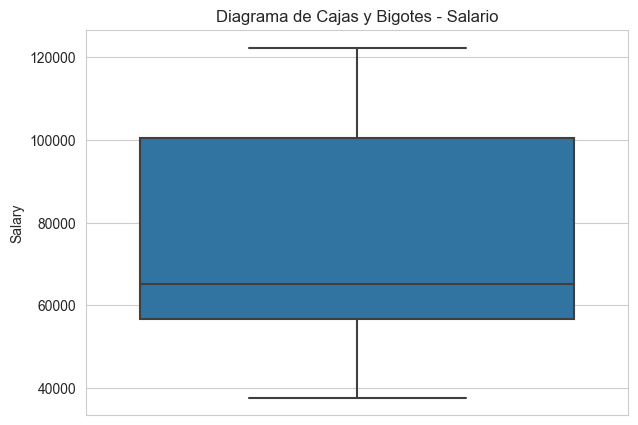

In [8]:
# Ignorar advertencias de futuras versiones
warnings.filterwarnings('ignore') 

# # Establecer el estilo de las gráficas como 'whitegrid'
sns.set_style("whitegrid")

# Diagrama de cajas y bigotes para 'Salary'
plt.figure(figsize=(7, 5))
sns.boxplot(y=df_salary['Salary'])
plt.title('Diagrama de Cajas y Bigotes - Salario')
plt.show()

Este gráfico muestra la distribución de los salarios en el conjunto de datos. Podemos observar lo siguiente:
- La mayor concentración de salarios está en el rango entre 50,000 y 100,000 unidades monetarias.
- La mediana se encuentra alrededor de los 70,000, lo que indica que la mitad de los salarios están por debajo de este valor.

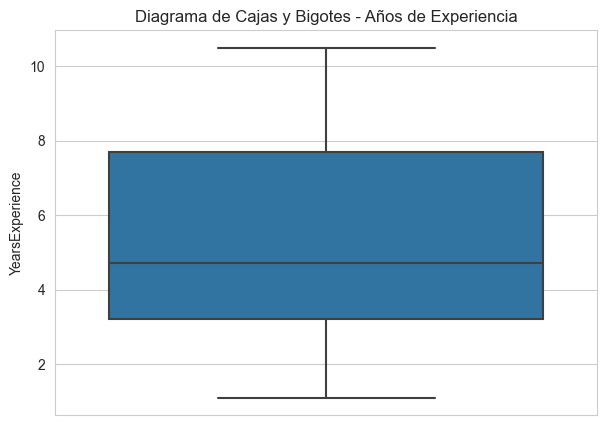

In [29]:
# Ignorar advertencias de futuras versiones
warnings.filterwarnings('ignore') 

# # Establecer el estilo de las gráficas como 'whitegrid'
sns.set_style("whitegrid")

# Diagrama de cajas y bigotes para 'YearsExperience'
plt.figure(figsize=(7, 5))
sns.boxplot(y=df_salary['YearsExperience'])
plt.title('Diagrama de Cajas y Bigotes - Años de Experiencia')
plt.show()

Este gráfico muestra la distribución de los años de experiencia:
- La mayoría de los empleados tiene entre 2 y 7 años de experiencia.
- No se observan valores atípicos destacados en la variable de años de experiencia.
- La mediana se encuentra alrededor de los 5 años de experiencia, lo que sugiere que el conjunto de datos está centrado en empleados con experiencia moderada.

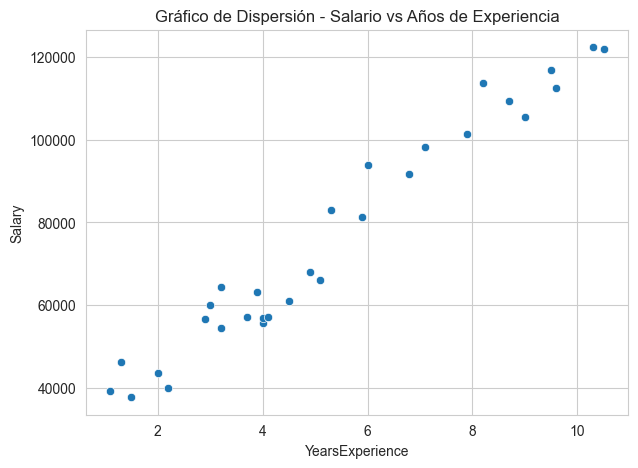

In [9]:
# Gráfico de dispersión de 'Salary' vs 'YearsExperience'
plt.figure(figsize=(7, 5))
sns.scatterplot(x='YearsExperience', y='Salary', data=df_salary)
plt.title('Gráfico de Dispersión - Salario vs Años de Experiencia')
plt.show()

El gráfico de dispersión nos muestra cómo se relacionan los años de experiencia con el salario:
- Existe una clara tendencia positiva: a medida que los empleados tienen más años de experiencia, su salario tiende a aumentar.
- Sin embargo, parece haber cierta dispersión en los salarios para aquellos con más experiencia, lo que indica que el crecimiento salarial no es lineal ni uniforme en todos los casos.

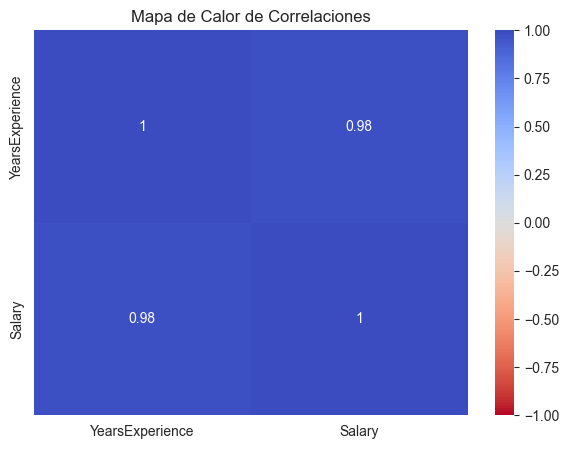

In [10]:
# Mapa de calor de las correlaciones
plt.figure(figsize=(7, 5))
correlation_matrix = df_salary.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

Este mapa de calor visualiza las correlaciones entre las variables **Salary** y **YearsExperience**:
- La correlación entre ambas variables es alta y positiva (+0.97), lo que confirma que los empleados con más años de experiencia suelen tener salarios más altos.
- Este fuerte coeficiente sugiere que la experiencia laboral es un predictor clave del salario, lo que podría ser relevante para modelos de predicción.

5. **Ajuste del modelo**:
Se ajusta un modelo de regresión lineal utilizando `Salary` como variable respuesta y `YearsExperience` como variable predictora. En cualquier estudio predictivo, no solo es esencial ajustar el modelo, sino también evaluar su capacidad para predecir correctamente nuevas observaciones. Para realizar esta evaluación de manera adecuada, los datos se dividen en dos grupos: uno destinado al entrenamiento del modelo y otro reservado para pruebas, lo que permite validar su rendimiento en datos no utilizados durante el ajuste del modelo.

In [87]:
# División de los datos en conjuntos de entrenamiento y prueba
# X contiene la variable predictora 'YearsExperience' y y es la variable objetivo 'Salary'.
X = df_salary[['YearsExperience']]
y = df_salary['Salary']

In [88]:
# Se divide el conjunto de datos en un 80% para entrenamiento y un 20% para prueba.
# random_state = 42 asegura que la división sea reproducible.
# shuffle = True indica que los datos se mezclarán antes de dividirse.
X_train, X_test, y_train, y_test = train_test_split(
                                        X,               # Variables predictoras
                                        y,               # Variable objetivo
                                        train_size   = 0.8,  # Tamaño del conjunto de entrenamiento
                                        random_state = 42,    # Para obtener resultados reproducibles
                                        shuffle      = True  # Mezclar los datos antes de dividir
                                    )

:::{admonition} **Observación**
:class: warning

* El número `42` es comúnmente elegido en la literatura relacionada con la **inteligencia artificial** (AI) como un homenaje al libro de Douglas Adams, *[The Hitchhiker's Guide to the Galaxy](https://en.wikipedia.org/wiki/Phrases_from_The_Hitchhiker%27s_Guide_to_the_Galaxy#The_number_42)*, una popular serie de ciencia ficción. En este libro, el número 42 es presentado como la respuesta a la gran pregunta sobre “la vida, el universo y todo lo demás”, según los cálculos de un superordenador llamado **"Deep Thought"**. Esta referencia ha ganado notoriedad tanto entre los aficionados al género como entre los miembros de la comunidad científica.

* En el contexto de la programación, el parámetro `random_state` puede tomar cualquier número entero. Si bien se suele utilizar `42` por razones simbólicas, en realidad cualquier entero positivo es válido. Además, se podría realizar un `grid search` para encontrar el valor de `random_state` que proporcione el mejor rendimiento del modelo. Más adelante, abordaremos el uso de **GridSearch**.

* Es importante tener en cuenta que, si no se establece un valor específico para `random_state`, como `42` u otro número entero, cada vez que se ejecute el código, se generará un conjunto de prueba diferente, lo que puede afectar la reproducibilidad de los resultados.

:::

In [89]:
# Creación del modelo de regresión lineal
# Se crea un objeto de regresión lineal utilizando la clase LinearRegression de sklearn.
# Luego, se ajusta el modelo a los datos de entrenamiento X_train y y_train.
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)

LinearRegression()

- Los parámetros de "pendiente" ($\hat{\beta}_{i},~i=1,2,\dots,p$), también llamados pesos o coeficientes, se almacenan en el atributo `coef_`, mientras que el desplazamiento o intercepción ($\hat{\beta}_{0}$) se almacena en el atributo `intercept_`:

In [90]:
print("lr.coef_: {}".format(modelo.coef_))
print("lr.intercept_: {}".format(modelo.intercept_))

lr.coef_: [9423.81532303]
lr.intercept_: 25321.583011776813


:::{admonition} **Observación**
:class: warning

El guión bajo (`_`) al final de atributos como `coef_` e `intercept_` es una convención comúnmente utilizada en **scikit-learn** para indicar que dichos atributos son derivados de los datos de entrenamiento. Esta convención permite distinguir entre los atributos que son calculados por el modelo y los parámetros que son definidos por el usuario. De esta manera, los atributos que terminan con un guión bajo (`_`) indican que son aprendidos o ajustados durante el proceso de entrenamiento del modelo.

:::

* La función `modelo.predict()` se utiliza en `scikit-learn` para realizar **predicciones utilizando un modelo previamente entrenado**. En el contexto de un modelo de regresión lineal, como el que has ajustado, `modelo.predict()` toma como entrada un conjunto de datos (generalmente las variables predictoras) y devuelve las predicciones del modelo sobre esas entradas.

In [91]:
# para los datos conocidos del conjunto de train
y_pred_train = modelo.predict(X_train)
print(f"Primeras tres predicciones: {y_pred_train[0:3]}")

Primeras tres predicciones: [122386.880839   107308.77632215  63016.8443039 ]


In [92]:
# para los datos desconocidos
y_pred_test = modelo.predict(X_test)
print(f"Primeras tres predicciones: {y_pred_test[0:3]}")

Primeras tres predicciones: [115790.21011287  71498.27809463 102596.86866063]


6. Visualización del conjunto de entrenamiento y prueba

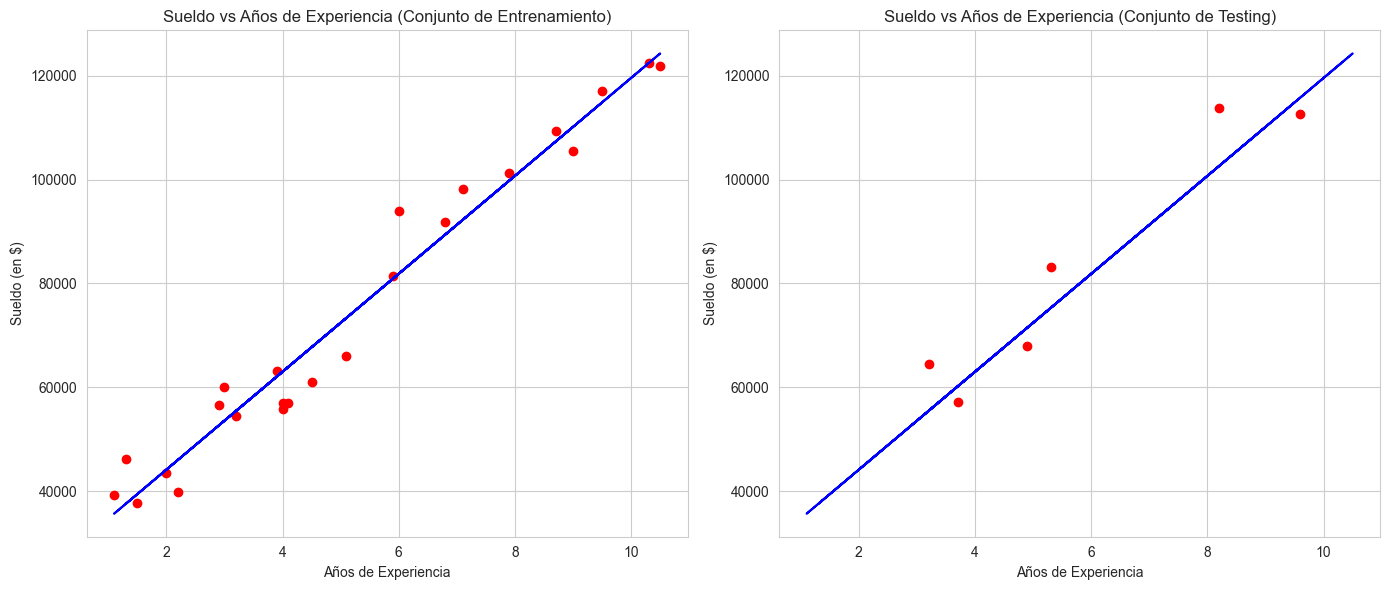

In [93]:
# Crear una figura para mostrar ambas gráficas una al lado de la otra
plt.figure(figsize=(14, 6))

# Visualizar los resultados del conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color="red")
plt.plot(X_train, modelo.predict(X_train), color="blue")
plt.title("Sueldo vs Años de Experiencia (Conjunto de Entrenamiento)")
plt.xlabel("Años de Experiencia")
plt.ylabel("Sueldo (en $)")

# Visualizar los resultados del conjunto de prueba
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color="red")
plt.plot(X_train, modelo.predict(X_train), color="blue")
plt.title("Sueldo vs Años de Experiencia (Conjunto de Testing)")
plt.xlabel("Años de Experiencia")
plt.ylabel("Sueldo (en $)")

# Mostrar las gráficas
plt.tight_layout()
plt.show()

### **Métricas de evaluacion del modelo de regresión**

La **métricas de evaluación** son medidas que se utilizan para evaluar el rendimiento de un modelo de regresión. Estas métricas permiten medir qué tan bien un modelo se ajusta a los datos observados y su capacidad para hacer predicciones precisas sobre nuevos datos. La elección de la métrica adecuada es crucial, ya que cada métrica puede destacar diferentes aspectos del rendimiento del modelo, como la magnitud del error, la sensibilidad a valores atípicos, o la proporción de la varianza explicada por el modelo.

In [31]:
# Importar las librerías necesarias para el cálculo de las métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error

Algunas métricas de evaluación del modelo son:

#### 1. **Error Cuadrático Medio ($MSE$ - Mean Squared Error)**

El **Error Cuadrático Medio ($MSE$)** mide la media de los errores al cuadrado entre los valores predichos y los valores reales. Penaliza los errores grandes más que los pequeños debido a la elevación al cuadrado.

Este se utiliza para evaluar qué tan bien se ajusta el modelo a los datos de entrenamiento o de prueba. Un MSE más bajo indica un mejor ajuste del modelo.

- **Fórmula**:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2,
$$

donde:
- $n$ es el número total de observaciones,
- $y_i$ son los valores reales,
- $\hat{y}_i$ son los valores predichos.


In [51]:
# Error Cuadrático Medio (MSE)
print("Training set MSE: {:.4f}".format(mean_squared_error(y_train, y_pred_train)))
print("Test set MSE: {:.4f}".format(mean_squared_error(y_test, y_pred_test)))

Training set MSE: 27102249.7313
Test set MSE: 49830096.8559


##### **Interpretación de MSE**:

1. **Diferencia significativa entre los MSE**:
   - El **MSE** en el conjunto de prueba es considerablemente mayor que en el conjunto de entrenamiento. Esto indica que el modelo tiene un mejor rendimiento en los datos de entrenamiento en comparación con los datos no vistos (conjunto de prueba).
   - Esta diferencia sugiere que el modelo podría estar **sobreajustado** (overfitting), lo que significa que ha aprendido bien los detalles de los datos de entrenamiento, pero no generaliza de manera óptima a nuevos datos.

2. **Sobreajuste (Overfitting)**:
   - El sobreajuste ocurre cuando el modelo se adapta demasiado a las particularidades del conjunto de entrenamiento, incluyendo el ruido, y por lo tanto tiene un error bajo en entrenamiento pero un error considerablemente mayor en los datos de prueba.
   - En este caso, la diferencia en los MSEs indica un potencial sobreajuste, ya que el error en los datos de prueba es casi el doble del error en los datos de entrenamiento.

3. **Magnitud del MSE**:
   - El **MSE** está en las unidades de la variable objetivo (salario), elevadas al cuadrado. Si bien el valor del MSE no es fácilmente interpretable directamente, la gran diferencia entre el conjunto de entrenamiento y el de prueba indica que el modelo no está generalizando bien.

##### **Conclusiones de MSE**:

- El modelo tiene un rendimiento significativamente mejor en el conjunto de entrenamiento que en el conjunto de prueba, lo que sugiere que podría estar sobreajustado.
- Es posible que el modelo esté capturando patrones específicos del conjunto de entrenamiento que no se replican bien en datos nuevos.
- Para mejorar el rendimiento en el conjunto de prueba, podrían considerarse las siguientes acciones:
  1. Aplicar técnicas de **regularización** (como **Ridge** o **Lasso**) para reducir el sobreajuste.
  2. Implementar **validación cruzada** para evaluar mejor el rendimiento del modelo y ajustar sus hiperparámetros.
  3. **Obtener más datos** de entrenamiento para ayudar al modelo a generalizar mejor a nuevos datos.

#### 2. **Error Absoluto Medio ($MAE$ - Mean Absolute Error)**

El **Error Absoluto Medio ($MAE$)** mide el promedio de las diferencias absolutas entre los valores predichos y los valores reales. No eleva al cuadrado los errores, por lo que no es tan sensible a valores atípicos.

Este se utiliza cuando queremos una interpretación más directa del error medio en las mismas unidades que la variable objetivo.

- **Fórmula**:

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|,
$$

donde:
- $n$ es el número total de observaciones,
- $y_i$ son los valores reales,
- $\hat{y}_i$ son los valores predichos.



In [57]:
# Error Absoluto Medio (MAE)
print("Training set MAE: {:.4f}".format(mean_absolute_error(y_train, y_pred_train)))
print("Test set MAE: {:.4f}".format(mean_absolute_error(y_test, y_pred_test)))

Training set MAE: 4221.0467
Test set MAE: 6286.4538


##### **Interpretación de MAE**:

1. **Diferencia entre los MAE de entrenamiento y prueba**:
   - El **MAE** en el conjunto de prueba es significativamente mayor que en el conjunto de entrenamiento. Esto indica que el modelo tiene un mejor rendimiento en los datos de entrenamiento que en los datos de prueba.
   - Esta diferencia sugiere que el modelo podría estar **sobreajustado** (overfitting). Es decir, el modelo se ajusta muy bien a los datos de entrenamiento, pero no generaliza tan bien cuando se le presentan datos nuevos.

2. **Magnitud del MAE**:
   - El **MAE** mide el error promedio absoluto en las predicciones, es decir, cuánto se desvían las predicciones del modelo en promedio respecto a los valores reales de salario. El error promedio en el conjunto de entrenamiento es de aproximadamente **4,221 unidades monetarias**, mientras que en el conjunto de prueba es de **6,286 unidades monetarias**.
   - Aunque la diferencia entre los errores en ambos conjuntos no es enorme, sigue siendo notable. Esto indica que el modelo está haciendo mejores predicciones en los datos que ha visto (entrenamiento) en comparación con los datos que no ha visto antes (prueba).

3. **Posible sobreajuste (Overfitting)**:
   - El hecho de que el error en el conjunto de prueba sea mayor que en el conjunto de entrenamiento sugiere que el modelo está capturando patrones específicos del conjunto de entrenamiento que no se reflejan bien en los nuevos datos. Este comportamiento es típico de un modelo que está sobreajustado.
   - En este caso, el modelo podría estar adaptándose demasiado a las peculiaridades de los datos de entrenamiento, y esto está afectando su capacidad para generalizar a datos no vistos.

##### **Conclusiones de MAE**:

- La diferencia entre los **MAE** sugiere que el modelo está funcionando bien en el conjunto de entrenamiento, pero tiene un peor rendimiento en el conjunto de prueba, lo que indica que podría estar sobreajustado.
- El modelo tiene un error promedio en las predicciones de salario de aproximadamente **6,286 unidades monetarias** en los datos de prueba, lo que podría ser un error significativo dependiendo del contexto del problema.
- Para mejorar el rendimiento del modelo y reducir el posible sobreajuste, se pueden tomar las siguientes acciones:
  1. Aplicar técnicas de **regularización** (como **Ridge** o **Lasso**) para reducir la complejidad del modelo y mejorar la generalización.
  2. Utilizar **validación cruzada** para evaluar el rendimiento del modelo en múltiples divisiones de los datos y reducir el riesgo de sobreajuste.
  3. **Aumentar el tamaño del conjunto de datos** de entrenamiento, si es posible, para ayudar al modelo a generalizar mejor.


#### 3. **Raíz del Error Cuadrático Medio ($RMSE$ - Root Mean Squared Error)**
El **$RMSE$** es la raíz cuadrada del $MSE$ y devuelve el error en las mismas unidades que la variable dependiente, lo que facilita la interpretación.

Este al igual que el $MSE$, mide el ajuste del modelo, pero es más fácil de interpretar porque está en las mismas unidades que los datos.

- **Fórmula**:

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2},
$$

donde:
- $n$ es el número total de observaciones,
- $y_i$ son los valores reales,
- $\hat{y}_i$ son los valores predichos.

In [58]:
# Raíz del Error Cuadrático Medio (RMSE)
print("Training set RMSE: {:.4f}".format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print("Test set RMSE: {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_test))))

Training set RMSE: 5205.9821
Test set RMSE: 7059.0436


##### **Interpretación de RMSE**:

1. **Diferencia entre los RMSE de entrenamiento y prueba**:
   - El **RMSE** en el conjunto de prueba es mayor que en el conjunto de entrenamiento. Esto significa que el modelo está cometiendo errores más grandes en las predicciones de los datos no vistos (conjunto de prueba) en comparación con los datos con los que fue entrenado.
   - Aunque la diferencia entre ambos **RMSE** no es extrema, sugiere que el modelo podría estar **sobreajustado** (overfitting) a los datos de entrenamiento. El modelo parece ajustarse mejor a los datos que ya ha visto y tiene un rendimiento inferior en nuevos datos.

2. **Magnitud del RMSE**:
   - El **RMSE** te dice, en promedio, cuánto se desvían las predicciones del modelo respecto a los valores reales, pero en las mismas unidades de la variable objetivo (en este caso, el salario). 
   - En el conjunto de entrenamiento, el error promedio es de aproximadamente **5,206 unidades monetarias**, mientras que en el conjunto de prueba, el error promedio es de **7,059 unidades monetarias**.
   - Esto significa que en datos de prueba (nuevos datos no vistos), las predicciones del modelo están, en promedio, a **7,059 unidades** de los valores reales de salario.

3. **Posible sobreajuste (Overfitting)**:
   - El hecho de que el **RMSE** sea mayor en el conjunto de prueba sugiere un posible **sobreajuste**. Aunque el modelo se desempeña bien en el conjunto de entrenamiento (con un **RMSE** más bajo), su rendimiento en datos no vistos no es tan bueno.
   - Sin embargo, la diferencia en los **RMSE** entre los conjuntos de entrenamiento y prueba no es excesivamente grande, lo que indica que el sobreajuste no es muy severo, pero aún podría mejorarse.

4. **Comparación con el MAE y el MSE**:
   - El **RMSE** es más sensible a los errores grandes en las predicciones que el **MAE**. Dado que el **RMSE** penaliza más los errores grandes, un **RMSE** mayor en el conjunto de prueba puede estar indicando que hay algunos errores considerables en las predicciones que el modelo está haciendo en datos no vistos.

##### **Conclusiones de RMSE**:

- El **RMSE** más alto en el conjunto de prueba en comparación con el de entrenamiento sugiere que el modelo podría estar ligeramente **sobreajustado**. Aunque no hay una diferencia extremadamente grande entre los valores de RMSE, el modelo claramente tiene un mejor rendimiento en los datos de entrenamiento.
- La magnitud del error promedio (alrededor de **7,059 unidades monetarias** en el conjunto de prueba) puede considerarse significativa, dependiendo del rango de salarios en los datos. Esto indica que hay margen para mejorar las predicciones del modelo.
- Para mejorar el rendimiento del modelo, especialmente en datos no vistos, se pueden considerar las siguientes acciones:
  1. Aplicar técnicas de **regularización** (como **Ridge** o **Lasso**) para reducir el sobreajuste.
  2. Implementar **validación cruzada** para obtener una mejor medida de la capacidad de generalización del modelo.
  3. Considerar añadir más datos de entrenamiento, si es posible, o explorar nuevas variables predictoras que puedan mejorar la precisión del modelo.

##### **Resumen de RMSE**:
El modelo tiene un **RMSE** más bajo en el conjunto de entrenamiento, lo que indica un buen ajuste a esos datos, pero el mayor **RMSE** en el conjunto de prueba sugiere que el modelo no generaliza tan bien en datos nuevos. Aunque la diferencia no es extremadamente grande, esto sugiere que el modelo puede estar sobreajustado y hay margen para mejorar su capacidad de generalización.


#### 4. **Coeficiente de Determinación ($R^2$ - $R$-squared)**

El **coeficiente de determinación ($R^2$)** mide la proporción de la varianza de la variable dependiente que es explicada por las variables independientes. Su valor está entre 0 y 1.

Esto indica qué tan bien se ajusta el modelo a los datos. Un valor cercano a 1 sugiere un ajuste muy bueno.

- **Fórmula**:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2},
$$

donde:
- $n$ es el número total de observaciones,
- $y_i$ son los valores reales,
- $\hat{y}_i$ son los valores predichos.
- $\bar{y}$ es el promedio de los valores reales.

In [59]:
# Coeficiente de Determinación (R²)
print("Training set R²: {:.4f}".format(r2_score(y_train, y_pred_train)))
print("Test set R²: {:.4f}".format(r2_score(y_test, y_pred_test)))

Training set R²: 0.9645
Test set R²: 0.9024


* Como tenemos integrado el `.score` en **scikit-learn**, este también calcula $R^2$

In [60]:
# Coeficiente de Determinación (R²)
print("Training set R²: {:.4f}".format(modelo.score(X_train, y_train)))
print("Test set R²: {:.4f}".format(modelo.score(X_test, y_test)))

Training set R²: 0.9645
Test set R²: 0.9024


##### **Interpretación de $R^2$**:

1. **Valor de $R^2$**:
   - El **$R^2$** indica qué proporción de la variabilidad en la variable dependiente (salario) es explicada por el modelo basado en la variable independiente (años de experiencia). Un valor de **R²** más cercano a 1 indica un mejor ajuste del modelo.
   - En el conjunto de entrenamiento, un **$R^2$** de **0.9645** significa que el modelo explica el **96.45%** de la variabilidad en los salarios en función de los años de experiencia.
   - En el conjunto de prueba, un **$R^2$** de **0.9024** indica que el modelo sigue explicando el **90.24%** de la variabilidad en los salarios, lo que sugiere que el modelo sigue siendo bastante preciso en datos no vistos.

2. **Diferencia entre los valores de $R^2$ de entrenamiento y prueba**:
   - Aunque el **$R^2$** del conjunto de prueba es un poco menor que en el conjunto de entrenamiento, la diferencia no es grande. Esto sugiere que el modelo generaliza relativamente bien en nuevos datos, aunque hay una leve disminución en su capacidad para explicar la variabilidad en los salarios en los datos de prueba.
   - Esta diferencia menor podría indicar un **ligero sobreajuste** (overfitting), donde el modelo se ajusta un poco mejor a los datos de entrenamiento que a los de prueba, pero aún generaliza razonablemente bien.

3. **Buen ajuste del modelo**:
   - Con un **$R^2$** superior a 0.90 tanto en los datos de entrenamiento como de prueba, podemos decir que el modelo tiene un **buen ajuste** y que la variable de **años de experiencia** explica bien la variabilidad en los salarios.
   - A pesar de la pequeña disminución en el rendimiento en los datos de prueba, el modelo sigue siendo útil para predecir salarios en función de la experiencia.

##### **Conclusiones de $R^2$**:

- El alto **$R^2$** en el conjunto de entrenamiento (**0.9645**) indica que el modelo está bien ajustado a los datos de entrenamiento.
- El **$R^2$** del conjunto de prueba (**0.9024**) sugiere que el modelo generaliza bien en datos no vistos, aunque existe una pequeña diferencia que podría indicar un leve **sobreajuste**.
- A pesar de esta pequeña diferencia, el modelo sigue siendo robusto, ya que explica más del **90%** de la variabilidad en los salarios en el conjunto de prueba.

##### **Posibles acciones para mejorar (si es necesario) de $R^2$**:
- Dado que el modelo ya está funcionando bien, las siguientes acciones solo serían necesarias si se busca mejorar aún más la generalización:
  1. Aplicar **técnicas de regularización** (como **Ridge** o **Lasso**) para evitar cualquier posible sobreajuste.
  2. Implementar **validación cruzada** para obtener una mejor evaluación de la capacidad del modelo para generalizar.
  3. Añadir más datos o explorar otras características predictoras que puedan mejorar la precisión del modelo.

##### **Resumen de $R^2$**:
El modelo tiene un **$R^2$** alto en ambos conjuntos (entrenamiento y prueba), lo que indica que el modelo ajusta bien los datos y generaliza razonablemente bien a datos no vistos. La pequeña diferencia entre el **R²** del entrenamiento y el de prueba podría sugerir un leve sobreajuste, pero en general el modelo es sólido para predecir salarios basados en la experiencia.

#### 5. **$R^2$ Ajustado (Adjusted $R$-squared)**

El **$R^2$ ajustado** es una versión modificada del coeficiente de determinación $R^2$ que tiene en cuenta el número de predictores en el modelo. Penaliza la adición de predictores irrelevantes que no mejoran significativamente el modelo.

Es útil cuando se está comparando el rendimiento de modelos que tienen diferentes cantidades de variables independientes. Un $R^2$ puede aumentar simplemente por agregar más variables, pero el **$R^2$ ajustado** solo aumenta si las nuevas variables realmente mejoran el modelo.

- **Fórmula**:

$$
R^2_{\text{ajustado}} = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - k - 1} \right)
$$
  
Donde:
- $R^2$ es el coeficiente de determinación,
- $n$ es el número de observaciones,
- $k$ es el número de predictores (variables independientes).

In [61]:
# Calcular R² ajustado train
n = len(y_train)  # número de observaciones
p = X_train.shape[1]  # número de predictores
r2_ajustado_train = 1 - (1 - modelo.score(X_train, y_train)) * (n - 1) / (n - p - 1)

# Calcular R² ajustado test
n = len(y_test)  # número de observaciones
p = X_train.shape[1]  # número de predictores
r2_ajustado_test = 1 - (1 - modelo.score(X_test, y_test)) * (n - 1) / (n - p - 1)

print("Training set R² ajustado: {:.4f}".format(r2_ajustado_train))
print("Test set R² ajustado: {:.4f}".format(r2_ajustado_test))

Training set R² ajustado: 0.9629
Test set R² ajustado: 0.8781


##### **Interpretación de $R^2$ ajustado**:

1. **¿Qué es el $R^2$ ajustado?**:
   - El **$R^2$ ajustado** es una versión ajustada del **$R^2$** que penaliza por la cantidad de predictores utilizados en el modelo. Es especialmente útil cuando se trabaja con múltiples variables independientes, ya que evita inflar artificialmente el **$R^2$** simplemente añadiendo más predictores que podrían no ser útiles.
   - El **$R^2$ ajustado** proporciona una mejor medida de la capacidad de generalización del modelo cuando se tiene más de una variable predictora. Si solo tienes una variable predictora (como en este caso, con **YearsExperience**), la diferencia entre el **$R^2$** y el **$R^2$ ajustado** será pequeña, como se refleja en tus resultados.

2. **$R^2$ ajustado en el conjunto de entrenamiento**:
   - Un **$R^2$ ajustado** de **0.9629** en el conjunto de entrenamiento sugiere que el modelo explica el **96.29%** de la variación en los salarios en función de los años de experiencia, incluso teniendo en cuenta posibles sobreajustes.
   - La diferencia entre el **$R^2$** original (**0.9645**) y el **$R^2$ ajustado** (**0.9629**) es muy pequeña, lo que indica que el modelo es bastante confiable en los datos de entrenamiento y que no hay un impacto significativo por tener un número limitado de predictores.

3. **$R^2$ ajustado en el conjunto de prueba**:
   - Un **$R^2$ ajustado** de **0.8781** en el conjunto de prueba significa que, cuando se penaliza la complejidad del modelo, este sigue explicando el **87.81%** de la variación en los salarios en los datos no vistos.
   - La diferencia entre el **$R^2$ ajustado** y el **$R^2$** original en el conjunto de prueba (**0.9024**) indica una leve penalización, lo que sugiere que el modelo no generaliza tan bien en comparación con su rendimiento en los datos de entrenamiento.

4. **Comparación entre $R^2$ ajustado en entrenamiento y prueba**:
   - El **$R^2$ ajustado** en el conjunto de entrenamiento es mayor que en el conjunto de prueba, lo que refleja que el modelo tiene un mejor ajuste a los datos con los que fue entrenado que a los nuevos datos.
   - La diferencia entre el **$R^2$ ajustado** del conjunto de entrenamiento (**0.9629**) y el del conjunto de prueba (**0.8781**) sugiere que el modelo puede estar ligeramente **sobreajustado** (overfitting), ya que está funcionando un poco mejor en el conjunto de entrenamiento en comparación con el conjunto de prueba.

##### **Conclusiones de $R^2$ ajustado**:

- El **$R^2$ ajustado** más bajo en el conjunto de prueba (0.8781) en comparación con el conjunto de entrenamiento (0.9629) indica que, aunque el modelo está funcionando bien, hay una pequeña diferencia en la capacidad de generalización, lo que podría indicar un **leve sobreajuste**.
- A pesar de esta diferencia, el **$R^2$ ajustado** sigue siendo relativamente alto, lo que sugiere que el modelo es razonablemente robusto y explica la mayor parte de la variabilidad en los salarios, tanto en los datos de entrenamiento como en los de prueba.

##### **Posibles acciones para mejorar $R^2$ ajustado**:
- Si deseas mejorar la capacidad de generalización del modelo, podrías aplicar técnicas de **regularización** como **Ridge** o **Lasso** para reducir el sobreajuste y mejorar el rendimiento en datos no vistos.
- Implementar **validación cruzada** para tener una mejor estimación de la capacidad de generalización del modelo y asegurarse de que está optimizado para datos nuevos.
- Explorar la adición de más características predictoras, si están disponibles, o aumentar el tamaño del conjunto de datos para mejorar aún más el ajuste y la generalización del modelo.

##### **Resumen de $R^2$ ajustado**:
- El **$R^2$ ajustado** del conjunto de entrenamiento (0.9629) y el del conjunto de prueba (0.8781) muestran que el modelo tiene un buen ajuste en los datos de entrenamiento, pero podría estar ligeramente sobreajustado. A pesar de esto, el modelo sigue explicando una gran parte de la variabilidad en los salarios, incluso en los datos de prueba. Sin embargo, hay margen para mejorar la capacidad de generalización mediante regularización u otras técnicas.

#### 6. **Error Medio Proporcional Absoluto ($MAPE$ - Mean Absolute Percentage Error)**

El **$MAPE$** mide el error porcentual promedio entre los valores reales y los predichos, lo que permite interpretar el error en términos relativos.

Es útil para entender el error en términos porcentuales, lo que es valioso cuando las magnitudes de los datos varían mucho.

- **Fórmula**:

$$
MAPE = \frac{100\%}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|
$$

donde:
- $n$ es el número total de observaciones,
- $y_i$ son los valores reales,
- $\hat{y}_i$ son los valores predichos.

In [63]:
# Error Medio Proporcional (MAPE)
mape_train = np.mean(np.abs((y_train - modelo.predict(X_train)) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - modelo.predict(X_test)) / y_test)) * 100

print("Training set MAPE: {:.4f}".format(mape_train))
print("Test set MAPE: {:.4f}".format(mape_test))

Training set MAPE: 6.7656
Test set MAPE: 7.7449


##### **Interpretación del MAPE**:

1. **¿Qué es el MAPE?**:
   - El **MAPE** mide el error porcentual medio absoluto entre los valores predichos y los valores reales. Indica el porcentaje promedio por el cual las predicciones del modelo difieren de los valores reales.
   - El **MAPE** se expresa como un porcentaje, por lo que un valor de **6.77%** en el conjunto de entrenamiento significa que, en promedio, las predicciones del modelo difieren un **6.77%** de los valores reales.

2. **MAPE en el conjunto de entrenamiento**:
   - Un **MAPE** de **6.77%** en el conjunto de entrenamiento sugiere que el modelo tiene un error porcentual medio relativamente bajo en los datos con los que fue entrenado. En otras palabras, las predicciones del modelo en el conjunto de entrenamiento son bastante cercanas a los valores reales.
   - Un MAPE menor al 10% generalmente se considera un buen resultado, ya que implica que las predicciones están relativamente bien ajustadas a los valores reales.

3. **MAPE en el conjunto de prueba**:
   - Un **MAPE** de **7.74%** en el conjunto de prueba sugiere que el modelo también predice con bastante precisión los valores de salario en datos no vistos, pero con un pequeño aumento en el error en comparación con los datos de entrenamiento.
   - Aunque hay una pequeña diferencia entre los valores de MAPE en el conjunto de entrenamiento y el de prueba, ambos valores son menores al 10%, lo que indica un buen desempeño del modelo.

4. **Diferencia entre los MAPE de entrenamiento y prueba**:
   - La diferencia entre el **MAPE** del conjunto de entrenamiento (**6.77%**) y el del conjunto de prueba (**7.74%**) es relativamente pequeña. Esta diferencia sugiere que el modelo tiene una buena capacidad de generalización, ya que no hay un aumento significativo en el error porcentual cuando se aplican las predicciones a nuevos datos.
   - Aunque el **MAPE** en el conjunto de prueba es un poco mayor, lo cual es esperado, esta diferencia no es lo suficientemente grande como para ser preocupante.

##### **Conclusiones de MAPE**:

- Los valores de **MAPE** tanto en el conjunto de entrenamiento (**6.77%**) como en el conjunto de prueba (**7.74%**) son relativamente bajos, lo que indica que el modelo está haciendo predicciones precisas en ambas muestras.
- La pequeña diferencia entre los **MAPE** sugiere que el modelo no está sobreajustado y tiene una buena capacidad para generalizar a nuevos datos.
- En general, los valores obtenidos indican que el modelo es confiable para hacer predicciones de salario basadas en la experiencia, con un error porcentual medio bastante razonable.

##### **Posibles acciones para mejorar (si es necesario) de MAPE**:
- Aunque los resultados son buenos, si se desea mejorar aún más la precisión del modelo, se podrían explorar las siguientes acciones:
  1. Aplicar **técnicas de regularización** (como **Ridge** o **Lasso**) para reducir cualquier posible sobreajuste residual.
  2. **Aumentar el tamaño del conjunto de datos** de entrenamiento o añadir más características predictoras relevantes, si están disponibles, para mejorar la precisión del modelo en datos no vistos.
  3. Utilizar **validación cruzada** para asegurar una estimación robusta del rendimiento del modelo en diferentes divisiones de los datos.

##### **Resumen de MAPE**:
- El **MAPE** en el conjunto de entrenamiento es **6.77%**, mientras que en el conjunto de prueba es **7.74%**. Estos valores sugieren que el modelo tiene un buen rendimiento en ambas muestras, con una ligera disminución de precisión en los datos de prueba. En general, el modelo es robusto y las predicciones de salario basadas en la experiencia son razonablemente precisas, con un error porcentual medio bajo.


#### 7. **Error Cuadrático Medio de Logaritmo ($MSLE$ - Mean Squared Logarithmic Error)**

El **$MSLE$** es una variante del $MSE$ que utiliza los logaritmos de los valores reales y predichos, en lugar de los valores originales.

Este se utiliza cuando se quiere penalizar más los errores de predicción en valores pequeños que en valores grandes.

- **Fórmula**:

$$
MSLE = \frac{1}{n} \sum_{i=1}^{n} \left( \log(1 + y_i) - \log(1 + \hat{y}_i) \right)^2,
$$

donde:
- $n$ es el número total de observaciones,
- $y_i$ son los valores reales,
- $\hat{y}_i$ son los valores predichos.

In [67]:
# Error Cuadrático Medio de Logaritmo (MSLE)
msle_train = mean_squared_log_error(y_train, modelo.predict(X_train))
msle_test = mean_squared_log_error(y_test, modelo.predict(X_test))

print("Training set MSLE: {:.4f}".format(msle_train))
print("Test set MSLE: {:.4f}".format(msle_test))

Training set MSLE: 0.0075
Test set MSLE: 0.0082


##### **Interpretación de MSLE**:

1. **¿Qué es el MSLE?**:
   - El **Error Cuadrático Medio Logarítmico (MSLE)** mide el error entre los logaritmos de las predicciones y los logaritmos de los valores reales. Es especialmente útil cuando deseas penalizar menos los errores grandes en las predicciones relativas, ya que considera las proporciones entre las predicciones y los valores reales.
   - Un **MSLE** bajo, como los valores obtenidos aquí, indica que las predicciones del modelo están relativamente cerca de los valores reales en términos proporcionales.

2. **MSLE en el conjunto de entrenamiento**:
   - Un **MSLE** de **0.0075** en el conjunto de entrenamiento sugiere que el modelo tiene un error logarítmico medio muy bajo. Esto significa que las diferencias entre los valores predichos y los valores reales, después de aplicar el logaritmo, son pequeñas.
   - El logaritmo suaviza las diferencias, lo que hace que este error sea útil cuando las diferencias relativas son importantes o cuando hay outliers en los datos.

3. **MSLE en el conjunto de prueba**:
   - El **MSLE** de **0.0082** en el conjunto de prueba indica que el modelo también tiene un error bajo en los datos no vistos. Aunque este valor es ligeramente mayor que el del conjunto de entrenamiento, la diferencia es pequeña.
   - Este bajo valor del **MSLE** sugiere que el modelo está prediciendo de manera precisa incluso en datos que no ha visto antes.

4. **Diferencia entre los MSLE de entrenamiento y prueba**:
   - La diferencia entre el **MSLE** del conjunto de entrenamiento (**0.0075**) y el del conjunto de prueba (**0.0082**) es mínima, lo que indica que el modelo tiene una buena capacidad de generalización y no muestra signos evidentes de sobreajuste (overfitting).
   - Esta pequeña diferencia es esperada, ya que los modelos suelen funcionar mejor en los datos con los que han sido entrenados, pero la diferencia aquí no es lo suficientemente grande como para ser preocupante.

##### **Conclusiones de MSLE**:

- Los valores bajos de **MSLE** en ambos conjuntos (entrenamiento y prueba) sugieren que el modelo es capaz de predecir los valores con un alto grado de precisión en términos relativos, incluso cuando se consideran errores grandes.
- La pequeña diferencia entre el **MSLE** de entrenamiento y prueba sugiere que el modelo tiene una **buena capacidad de generalización** y está funcionando bien tanto en los datos de entrenamiento como en los datos no vistos.

##### **Posibles acciones para mejorar de MSLE**:
- Aunque los resultados son buenos, si se busca mejorar aún más la precisión del modelo, se pueden considerar las siguientes acciones:
  1. Aplicar técnicas de **regularización** (como **Ridge** o **Lasso**) para reducir cualquier posible sobreajuste residual.
  2. Explorar más variables predictoras, si están disponibles, para mejorar la precisión del modelo y reducir aún más el error.
  3. **Validación cruzada** podría ser útil para obtener una mejor estimación de la capacidad de generalización del modelo en diferentes divisiones de los datos.

##### **Resumen de MSLE**:
- El **MSLE** en el conjunto de entrenamiento es **0.0075**, mientras que en el conjunto de prueba es **0.0082**. Estos valores bajos sugieren que el modelo está haciendo predicciones precisas tanto en los datos de entrenamiento como en los de prueba. La diferencia mínima entre ambos valores indica una **buena capacidad de generalización**, y el modelo es sólido en cuanto a su rendimiento en datos no vistos.


#### 8. **Error Relativo Absoluto ($RAE$ - Relative Absolute Error)**

El **$RAE$** compara el error absoluto del modelo con el error absoluto de un modelo de referencia, que usualmente es el modelo que predice el valor medio de la variable dependiente.

Este evalúa el rendimiento relativo del modelo comparado con una solución trivial.

- **Fórmula**:

$$
RAE = \frac{\sum_{i=1}^{n} |y_i - \hat{y}_i|}{\sum_{i=1}^{n} |y_i - \bar{y}|},
$$

donde:
- $n$ es el número total de observaciones,
- $y_i$ son los valores reales,
- $\hat{y}_i$ son los valores predichos.
- $\bar{y}$ es el promedio de los valores reales.

In [68]:
# Error Relativo Absoluto (RAE)
rae_train = np.sum(np.abs(y_train - modelo.predict(X_train))) / np.sum(np.abs(y_train - np.mean(y_train)))
rae_test = np.sum(np.abs(y_test - modelo.predict(X_test))) / np.sum(np.abs(y_test - np.mean(y_test)))

print("Training set RAE: {:.4f}".format(rae_train))
print("Test set RAE: {:.4f}".format(rae_test))

Training set RAE: 0.1684
Test set RAE: 0.3139


##### **Interpretación de RAE**:

1. **¿Qué es el RAE?**:
   - El **Error Relativo Absoluto (RAE)** mide la suma de los errores absolutos de las predicciones en relación con la suma de los errores absolutos de un modelo simple que predice la media de los valores reales. En resumen, compara el rendimiento del modelo con un modelo base.
   - Un valor de **RAE** más cercano a 0 indica que el modelo tiene un buen rendimiento en comparación con el modelo base. Cuanto más se acerque a 1, peor es el rendimiento relativo del modelo.

2. **RAE en el conjunto de entrenamiento**:
   - Un **RAE** de **0.1684** en el conjunto de entrenamiento significa que el modelo está cometiendo un error absoluto aproximadamente **16.84%** del error que cometería un modelo que simplemente predijera la media de los valores de entrenamiento. Este es un resultado muy bueno, ya que sugiere que el modelo es significativamente mejor que predecir simplemente la media.

3. **RAE en el conjunto de prueba**:
   - El **RAE** de **0.3139** en el conjunto de prueba indica que el modelo está cometiendo un error absoluto aproximadamente **31.39%** del error que cometería un modelo que simplemente predijera la media de los valores de prueba.
   - Aunque este valor sigue siendo bueno (ya que está lejos de 1), es mayor que el **RAE** en el conjunto de entrenamiento, lo que sugiere que el modelo es un poco menos efectivo en los datos de prueba que en los de entrenamiento.

4. **Diferencia entre los RAE de entrenamiento y prueba**:
   - La diferencia entre el **RAE** del conjunto de entrenamiento (**0.1684**) y el del conjunto de prueba (**0.3139**) es notable. Esto sugiere que el modelo tiene un rendimiento considerablemente mejor en los datos de entrenamiento que en los datos de prueba, lo que podría ser una señal de **sobreajuste** (overfitting).
   - El hecho de que el **RAE** sea mayor en el conjunto de prueba sugiere que el modelo está capturando detalles específicos del conjunto de entrenamiento que no se replican bien en los nuevos datos.

##### **Conclusiones de RAE**:

- El **RAE** del conjunto de entrenamiento es bajo (**0.1684**), lo que indica que el modelo está funcionando significativamente mejor que un modelo que predijera simplemente la media de los valores reales.
- El **RAE** del conjunto de prueba es mayor (**0.3139**), lo que sugiere que el modelo no generaliza tan bien a los nuevos datos como lo hace en el conjunto de entrenamiento. A pesar de esto, el modelo sigue teniendo un rendimiento relativamente bueno en comparación con un modelo base.
- La diferencia entre los **RAE** de entrenamiento y prueba indica que el modelo podría estar **sobreajustado** a los datos de entrenamiento y necesita mejorar su capacidad de generalización.

##### **Posibles acciones para mejorar de RAE**:

1. **Aplicar regularización**: Utilizar técnicas de regularización como **Ridge** o **Lasso** para reducir el sobreajuste y mejorar la capacidad de generalización del modelo en los datos de prueba.
2. **Validación cruzada**: Implementar validación cruzada para obtener una estimación más robusta del rendimiento del modelo en diferentes particiones de los datos.
3. **Añadir más datos**: Si es posible, aumentar el tamaño del conjunto de datos de entrenamiento podría ayudar a mejorar la capacidad del modelo para generalizar a nuevos datos.

##### **Resumen de RAE**:

- El **RAE** en el conjunto de entrenamiento es **0.1684**, lo que sugiere un buen ajuste a los datos de entrenamiento, mientras que el **RAE** en el conjunto de prueba es **0.3139**, lo que indica un rendimiento un poco peor en datos no vistos.
- La diferencia entre estos valores sugiere que el modelo está capturando patrones específicos de los datos de entrenamiento y no generaliza tan bien en datos nuevos, lo que podría indicar un **leve sobreajuste**. Para mejorar, se podrían aplicar técnicas de regularización o validación cruzada.


#### 9. **Error Cuadrático Relativo ($RSE$ - Relative Squared Error)**
El **$RSE$** compara el error cuadrático del modelo con el error cuadrático de un modelo de referencia (generalmente el promedio de los valores reales).

Similar al $RAE$, compara el rendimiento del modelo frente a un predictor básico.

- **Fórmula**:

$$
RSE = \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2},
$$

donde:
- $n$ es el número total de observaciones,
- $y_i$ son los valores reales,
- $\hat{y}_i$ son los valores predichos.
- $\bar{y}$ es el promedio de los valores reales.

In [69]:
# Error Cuadrático Relativo (RSE)
rse_train = np.sum((y_train - modelo.predict(X_train))**2) / np.sum((y_train - np.mean(y_train))**2)
rse_test = np.sum((y_test - modelo.predict(X_test))**2) / np.sum((y_test - np.mean(y_test))**2)

print("Training set RSE: {:.4f}".format(rse_train))
print("Test set RSE: {:.4f}".format(rse_test))

Training set RSE: 0.0355
Test set RSE: 0.0976


##### **Interpretación de RSE**:

1. **¿Qué es el RSE?**:
   - El **Error Cuadrático Relativo (RSE)** mide el error cuadrático de las predicciones en relación con el error cuadrático de un modelo simple que predice la media de los valores reales. Al igual que el **RAE**, el **RSE** compara el rendimiento del modelo con un modelo base que predice la media.
   - Un valor de **RSE** más cercano a 0 indica que el modelo está funcionando mucho mejor que un modelo base, mientras que un valor más cercano a 1 indica que el modelo tiene un rendimiento comparable al de un modelo base.

2. **RSE en el conjunto de entrenamiento**:
   - Un **RSE** de **0.0355** en el conjunto de entrenamiento significa que el modelo está cometiendo un error cuadrático que es aproximadamente el **3.55%** del error que cometería un modelo que predijera simplemente la media de los salarios en los datos de entrenamiento.
   - Este valor extremadamente bajo indica que el modelo tiene un rendimiento significativamente mejor que el modelo base en el conjunto de entrenamiento, ajustándose muy bien a los datos.

3. **RSE en el conjunto de prueba**:
   - Un **RSE** de **0.0976** en el conjunto de prueba indica que el modelo está cometiendo un error cuadrático que es aproximadamente el **9.76%** del error que cometería un modelo que simplemente predijera la media de los salarios en los datos de prueba.
   - Aunque este valor sigue siendo bajo, es considerablemente mayor que el **RSE** en el conjunto de entrenamiento, lo que sugiere que el modelo no tiene el mismo nivel de precisión en los datos no vistos.

4. **Diferencia entre los RSE de entrenamiento y prueba**:
   - La diferencia entre el **RSE** del conjunto de entrenamiento (**0.0355**) y el del conjunto de prueba (**0.0976**) indica que el modelo está funcionando mejor en los datos de entrenamiento que en los datos de prueba, lo que sugiere un posible **sobreajuste** (overfitting).
   - Aunque el **RSE** en el conjunto de prueba sigue siendo bajo, esta diferencia sugiere que el modelo ha aprendido patrones específicos de los datos de entrenamiento que no generalizan tan bien a los datos de prueba.

##### **Conclusiones de RSE**:

- El **RSE** del conjunto de entrenamiento es muy bajo (**0.0355**), lo que indica que el modelo tiene un rendimiento significativamente mejor que un modelo que predice la media de los salarios en esos datos.
- El **RSE** del conjunto de prueba es mayor (**0.0976**), pero sigue siendo bajo, lo que sugiere que el modelo sigue siendo mejor que un modelo base en los datos de prueba, aunque con menor precisión en comparación con los datos de entrenamiento.
- La diferencia entre los **RSE** de entrenamiento y prueba indica un posible **sobreajuste**, donde el modelo ha aprendido patrones específicos de los datos de entrenamiento que no se replican bien en los datos no vistos.

##### **Posibles acciones para mejorar de RSE**:

1. **Aplicar regularización**: Utilizar técnicas de regularización como **Ridge** o **Lasso** podría ayudar a reducir el sobreajuste y mejorar la capacidad del modelo para generalizar a nuevos datos.
2. **Validación cruzada**: Implementar validación cruzada para evaluar mejor el rendimiento del modelo y optimizar su capacidad de generalización en diferentes subconjuntos de los datos.
3. **Añadir más datos**: Si es posible, aumentar el tamaño del conjunto de entrenamiento o explorar otras características predictoras para mejorar aún más la precisión y capacidad de generalización del modelo.

##### **Resumen de RSE**:

- El **RSE** en el conjunto de entrenamiento es **0.0355**, lo que sugiere que el modelo se ajusta muy bien a los datos de entrenamiento. El **RSE** en el conjunto de prueba es **0.0976**, lo que indica que el modelo tiene un buen rendimiento en los datos no vistos, pero con una precisión algo menor.
- La diferencia entre los **RSE** sugiere que el modelo podría estar **ligeramente sobreajustado**, pero sigue siendo significativamente mejor que un modelo base que predice simplemente la media de los valores de salario.

Estas métricas permiten evaluar de manera precisa el rendimiento de los modelos de regresión. Dependiendo de la naturaleza del problema y de los objetivos del proyecto, se puede elegir una o varias métricas para obtener una visión completa del ajuste del modelo.

#### **Regresión Lineal con la librería Statsmodels**

La implementación de **regresión lineal** en **Statsmodels** es más completa que la de **Scikit-learn**, ya que, además de ajustar el modelo, permite calcular pruebas estadísticas y realizar análisis necesarios para verificar que se cumplen las condiciones sobre las que se basa este tipo de modelos. Esto la convierte en una herramienta más robusta para el análisis de regresión.

::: {admonition} Ventajas de Statsmodels
:class: note

- **Pruebas estadísticas**: Permite realizar pruebas como el análisis de varianza (ANOVA), pruebas de significancia de los coeficientes, e intervalos de confianza para los parámetros del modelo.
- **Análisis de residuales**: Facilita el análisis de los residuos, permitiendo evaluar si el modelo cumple con los supuestos de homocedasticidad, normalidad de los errores, entre otros.

:::

##### **Formas de entrenar un modelo de regresión en Statsmodels**:
1. **Indicando la fórmula del modelo**:
   - En esta forma, se especifica la fórmula del modelo (similar a cómo se hace en **R**) y se pasan los datos de entrenamiento como un DataFrame que incluye tanto la variable respuesta como los predictores.
   - Ejemplo de uso:

In [73]:
# datos train
datos_train = pd.concat([X_train, y_train], axis = 1)

# construcción del modelo
modelo = smf.ols(formula='Salary ~ YearsExperience', data=datos_train)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     598.4
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           1.91e-17
Time:                        18:54:38   Log-Likelihood:                -239.44
No. Observations:                  24   AIC:                             482.9
Df Residuals:                      22   BIC:                             485.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.532e+04   2285.938     

2. **Pasando matrices de predictores y la variable respuesta**:
   - En este enfoque, se pasa una matriz con los predictores y otra con la variable respuesta, similar a cómo se hace en **Scikit-learn**. Sin embargo, en **Statsmodels** es necesario añadir manualmente una columna de unos (`1s`) a la matriz de predictores para incluir el término independiente (intercepto) en el modelo.
   - Ejemplo de uso:

In [77]:
# importar la libreria
import statsmodels.api as sm

# construcción del modelo
X_train = sm.add_constant(X_train, prepend=True) # Añadir la columna de 1s para el intercepto
modelo = sm.OLS(endog=y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     598.4
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           1.91e-17
Time:                        18:58:57   Log-Likelihood:                -239.44
No. Observations:                  24   AIC:                             482.9
Df Residuals:                      22   BIC:                             485.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.532e+04   2285.938     

##### **Resultados de la Regresión Lineal (OLS)**

1. **Estadísticos del Modelo**:
- **R-squared (R²)**: 0.965
  - El modelo explica el **96.5%** de la variabilidad en el salario en función de los años de experiencia. Esto indica un **buen ajuste** del modelo a los datos.
  
- **Adjusted R-squared (R² ajustado)**: 0.963
  - El **R² ajustado** es ligeramente menor que el R², lo que es normal, ya que penaliza la inclusión de variables adicionales. En este caso, la diferencia es mínima, ya que solo tenemos un predictor.

- **F-statistic**: 598.4
  - La estadística **F** mide si el modelo en su conjunto es significativo. Un valor alto, como en este caso, sugiere que el modelo es válido y que la relación entre la variable dependiente (salario) y la independiente (años de experiencia) es estadísticamente significativa.

- **Prob(F-statistic)**: 1.91e-17
  - El valor p asociado con la estadística **F** es extremadamente pequeño (**1.91e-17**), lo que indica que es altamente improbable que el modelo en su conjunto sea insignificante. Esto refuerza la idea de que el modelo es significativo.

2. **Coeficientes del Modelo**:
- **Intercepto (const)**: 25,320.53
  - El salario base estimado para alguien con **0 años de experiencia** es de **25,320.53** unidades monetarias. Este es el valor esperado cuando **YearsExperience** es igual a 0.

- **YearsExperience**: 9423.82
  - El coeficiente para **YearsExperience** indica que, por cada año adicional de experiencia, el salario aumenta en **9,423.82** unidades monetarias, en promedio, manteniendo todas las demás variables constantes.

- **Valores P (P>|t|)**:
  - Tanto el intercepto como el coeficiente de **YearsExperience** tienen valores p extremadamente bajos (**0.000**), lo que indica que ambos son **estadísticamente significativos**. Esto significa que tanto el salario base como el aumento en salario asociado con cada año adicional de experiencia son diferentes de cero con un nivel de confianza muy alto.

3. **Intervalos de Confianza**:
- **[0.025, 0.975] para el Intercepto**: [20,600, 30,100]
  - Esto significa que, con un 95% de confianza, el salario base para alguien con 0 años de experiencia está entre **20,600** y **30,100** unidades monetarias.
  
- **[0.025, 0.975] para YearsExperience**: [8,625, 10,223]
  - Para **YearsExperience**, se puede decir con un 95% de confianza que el incremento en salario por cada año adicional de experiencia está entre **8,625** y **10,223** unidades monetarias.

4. **Pruebas de Supuestos del Modelo**:
- **Durbin-Watson**: 2.026
  - Este estadístico mide la autocorrelación de los residuos. Un valor cercano a **2** (como en este caso) indica que no hay autocorrelación significativa en los errores.

- **Omnibus Prob(Omnibus)**: 0.724
  - Esta prueba evalúa si los residuos del modelo se distribuyen de forma normal. Un valor p de **0.724** indica que no hay evidencia significativa de que los residuos se desvíen de la normalidad.

- **Jarque-Bera (Prob JB)**: 0.706
  - Al igual que el estadístico **Omnibus**, esta prueba evalúa la normalidad de los residuos. Un valor p de **0.706** también sugiere que no hay evidencia de que los residuos se desvíen de una distribución normal.

5. **Cond. No. (Número de Condición)**: 12.5
  - El número de condición es una medida de la multicolinealidad. Un valor menor de **30** sugiere que no hay problemas de multicolinealidad, lo cual es lógico ya que solo hay una variable independiente en el modelo.

6. **Conclusiones**:

- El modelo tiene un **buen ajuste** a los datos, ya que el **R²** es alto (**96.5%**).
- Tanto el **intercepto** como el **coeficiente de YearsExperience** son **estadísticamente significativos**, lo que indica que la experiencia tiene un impacto claro y positivo en los salarios.
- Los **residuos** del modelo parecen ser **normales** y no presentan problemas de autocorrelación, como lo indican las pruebas de **Durbin-Watson**, **Omnibus** y **Jarque-Bera**.
- En general, el modelo es **válido y robusto**, y se puede concluir que los años de experiencia explican gran parte de la variación en los salarios.

##### **Comparación con Scikit-learn**
- **Scikit-learn** está más orientado a la predicción y es ideal para construir modelos de regresión de forma rápida y eficiente, sin tener que preocuparse por el análisis estadístico detallado.
- **Statsmodels**, en cambio, está más orientado al análisis estadístico completo, proporcionando una visión detallada del ajuste del modelo y permitiendo realizar pruebas estadísticas y análisis de residuales de manera sencilla.

##### **Conclusión**
Si solo necesitas ajustar un modelo de regresión lineal rápidamente para hacer predicciones, **Scikit-learn** es una excelente opción. Sin embargo, si necesitas realizar un análisis estadístico completo del modelo, incluyendo pruebas de significancia y validación de los supuestos del modelo, **Statsmodels** es una herramienta más adecuada.